In [2]:
import tensorflow as tf
import matplotlib.pyplot as py
import cv2
import os
import PIL


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir = ".",untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [7]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [8]:
roses = list(data_dir.glob("roses/*"))

In [9]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

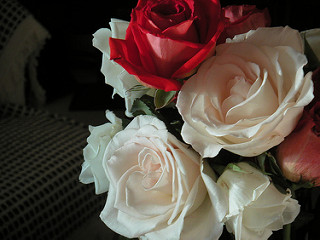

In [10]:
PIL.Image.open(str(roses[1]))

In [19]:
tulips = list(data_dir.glob("tulips/*.jpg"))

In [20]:
tulips

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('datasets/flower_photos/tulips/110147301_ad921e2828.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112334842_3ecf7585dd.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112428665_d8f3632f36_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips

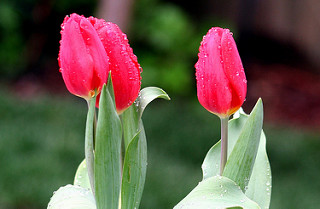

In [21]:
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    "roses":list(data_dir.glob("roses/*.jpg")),
    "daisy":list(data_dir.glob("daisy/*.jpg")),
    "dandelion":list(data_dir.glob("dandelion/*.jpg")),
    "sunflowers":list(data_dir.glob("sunflowers/*.jpg")),
    "tulips":list(data_dir.glob("tulips/*.jpg"))
}

In [12]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [13]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
} 

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) 

In [15]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [16]:
img.shape

(240, 179, 3)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
X,y= [],[]

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
import numpy as np

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [22]:
len(X_train)

2752

In [23]:
X_train / 255

array([[[[0.26666667, 0.30980392, 0.30196078],
         [0.24705882, 0.2745098 , 0.24705882],
         [0.23529412, 0.24313725, 0.21960784],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647]],

        [[0.22352941, 0.24313725, 0.23529412],
         [0.23921569, 0.25098039, 0.23529412],
         [0.23529412, 0.23921569, 0.21568627],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647],
         [0.19607843, 0.16078431, 0.14901961]],

        [[0.23921569, 0.22745098, 0.22352941],
         [0.25098039, 0.25098039, 0.23137255],
         [0.23137255, 0.23137255, 0.20784314],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.19215686, 0.15686275, 0.14509804],
         [0.19607843, 0.16078431, 0.14901961]],

        ...,

        [[0.19215686, 0.4745098 , 0.36470588],
         [0.15686275, 0.25490196, 0.2       ]

In [24]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [25]:
model = Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5,activation = "softmax")
])
model.compile(optimizer = 'adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [26]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 95s 1s/step - loss: 1.4329 - accuracy: 0.3721
Epoch 2/10
86/86 [==============================] - 95s 1s/step - loss: 1.0810 - accuracy: 0.5494
Epoch 3/10
86/86 [==============================] - 88s 1s/step - loss: 0.9661 - accuracy: 0.6079
Epoch 4/10
86/86 [==============================] - 82s 949ms/step - loss: 0.8622 - accuracy: 0.6613
Epoch 5/10
86/86 [==============================] - 88s 1s/step - loss: 0.7750 - accuracy: 0.7024
Epoch 6/10
86/86 [==============================] - 87s 1s/step - loss: 0.7044 - accuracy: 0.7326
Epoch 7/10
86/86 [==============================] - 83s 962ms/step - loss: 0.5758 - accuracy: 0.7849
Epoch 8/10
86/86 [==============================] - 81s 939ms/step - loss: 0.4959 - accuracy: 0.8165
Epoch 9/10
86/86 [==============================] - 81s 934ms/step - loss: 0.3991 - accuracy: 0.8583
Epoch 10/10
86/86 [==============================] - 75s 876ms/step - loss: 0.3015 - accuracy: 0.8968


In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 250ms/step - loss: 1.1023 - accuracy: 0.6885


[1.1023458242416382, 0.6884531378746033]

In [28]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 9s 293ms/step


array([[2.2611123e-02, 9.6491861e-01, 1.1960477e-02, 1.7456235e-07,
        5.0960528e-04],
       [9.9664551e-01, 2.1457727e-04, 4.2273064e-06, 1.7531393e-07,
        3.1353440e-03],
       [7.4986769e-05, 8.0801994e-03, 9.9181175e-01, 9.7996599e-07,
        3.2023781e-05],
       ...,
       [4.8108199e-03, 6.3180421e-05, 8.1612082e-04, 9.9351466e-01,
        7.9526164e-04],
       [9.7025406e-01, 1.9101563e-03, 2.0185597e-03, 7.2786155e-05,
        2.5744490e-02],
       [6.5753502e-03, 1.3380557e-05, 5.7687923e-02, 8.5383713e-01,
        8.1886262e-02]], dtype=float32)

In [29]:
np.argmax(np.array([0,78,123,8]))

2

In [30]:
np.argmax(predictions[0])

1

In [31]:
y_test[0]

1

In [41]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9), 
])

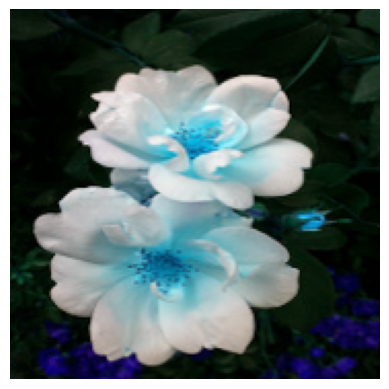

In [33]:
py.axis("off")
py.imshow(X[0])

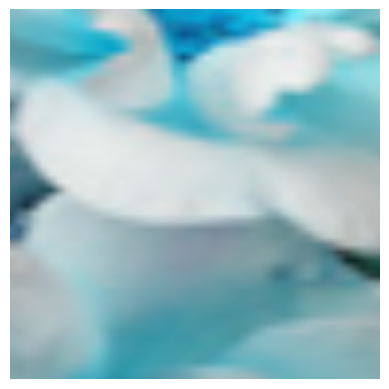

In [42]:
py.axis("off")
py.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [49]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),

])

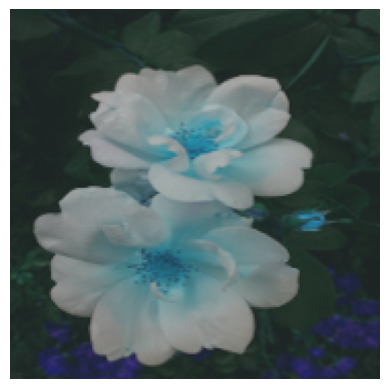

In [47]:
py.axis("off")
py.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [50]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5,activation = "softmax")
])
model.compile(optimizer = 'adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [51]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 90s 947ms/step - loss: 1.3744 - accuracy: 0.3953
Epoch 2/10
86/86 [==============================] - 82s 955ms/step - loss: 1.0846 - accuracy: 0.5661
Epoch 3/10
86/86 [==============================] - 81s 939ms/step - loss: 0.9551 - accuracy: 0.6334
Epoch 4/10
86/86 [==============================] - 81s 943ms/step - loss: 0.8594 - accuracy: 0.6751
Epoch 5/10
86/86 [==============================] - 81s 936ms/step - loss: 0.7893 - accuracy: 0.7057
Epoch 6/10
86/86 [==============================] - 89s 1s/step - loss: 0.7166 - accuracy: 0.7242
Epoch 7/10
86/86 [==============================] - 81s 944ms/step - loss: 0.6288 - accuracy: 0.7634
Epoch 8/10
86/86 [==============================] - 83s 958ms/step - loss: 0.5354 - accuracy: 0.8020
Epoch 9/10
86/86 [==============================] - 78s 910ms/step - loss: 0.4368 - accuracy: 0.8405
Epoch 10/10
86/86 [==============================] - 79s 918ms/step - loss: 0.3748 - accuracy:

In [52]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 244ms/step - loss: 1.0736 - accuracy: 0.6765


[1.0735580921173096, 0.6764705777168274]